<a href="https://colab.research.google.com/github/FernandoZR83/ANN_DL_ML/blob/master/MinimalExample_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This is an introduction to tensorflow 2.0 library


## Let us check out the tf version installed

In [1]:
!pip show tensorflow

Name: tensorflow
Version: 1.14.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.6/dist-packages
Requires: tensorboard, termcolor, numpy, wheel, gast, keras-preprocessing, six, grpcio, keras-applications, absl-py, astor, protobuf, wrapt, google-pasta, tensorflow-estimator
Required-by: stable-baselines, magenta, fancyimpute


Import libraries

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import tensorflow as tf

Data generation 
We need tensors to work with tensorflow

In [4]:
#!rm -rf '/content/ANN_DL_ML/'
!git clone 'https://github.com/FernandoZR83/ANN_DL_ML'

fatal: destination path 'ANN_DL_ML' already exists and is not an empty directory.


In [0]:
# First, we should declare a variable containing the size of the training set we want to generate.
observations = 100000

# We will work with two variables as inputs. You can think about them as x1 and x2 in our previous examples.
# We have picked x and z, since it is easier to differentiate them.
# We generate them randomly, drawing from an uniform distribution. There are 3 arguments of this method (low, high, size).
# The size of xs and zs is observations x 1. In this case: 1000 x 1.
xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10, 10, (observations,1))

# Combine the two dimensions of the input into one input matrix. 
# This is the X matrix from the linear model y = x*w + b.
# column_stack is a Numpy method, which combines two matrices (vectors) into one.
generated_inputs = np.column_stack((xs,zs))

# We add a random small noise to the function i.e. f(x,z) = 2x - 3z + 5 + <small noise>
noise = np.random.uniform(-1, 1, (observations,1))

# Produce the targets according to our f(x,z) = 2x - 3z + 5 + noise definition.
# In this way, we are basically saying: the weights should be 2 and -3, while the bias is 5.
generated_targets = 2*xs - 3*zs + 5 + noise

# save into an npz file called "TF_intro"
np.savez('TF_intro', inputs=generated_inputs, targets=generated_targets)

Solving with tensor flow

In [0]:
training_data = np.load('/content/ANN_DL_ML/TF_intro.npz')

In [12]:
input_size = 2
output_size = 1
#We build the model, necessary when using tensorflow

model = tf.keras.Sequential([
    tf.keras.layers.Dense(output_size)
    #tf.keras.layers.Dense(output size) takes the inputs provided to the model and 
    #calculates the dot productof the inputsand he weights and add bias
])


model.compile(optimizer = 'sgd', loss = 'mean_squared_error')
#model.compile(optimizer,loss) configures the model for training

#Which deta tensorflow has to fit?
#model.fit(inputs,targets) fits (trains) the model

model.fit(training_data['inputs'], training_data['targets'], epochs = 100, verbose = 1) # verbose = 0 is for not showing progress bar

W0724 15:37:05.555935 140032364136320 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Epoch 1/100
100000/100000 [==============================] - 8s 83us/sample - loss: 0.7793
Epoch 2/100
100000/100000 [==============================] - 4s 45us/sample - loss: 0.3464
Epoch 3/100
100000/100000 [==============================] - 4s 44us/sample - loss: 0.3458
Epoch 4/100
100000/100000 [==============================] - 4s 43us/sample - loss: 0.3461
Epoch 5/100
100000/100000 [==============================] - 5s 45us/sample - loss: 0.3456
Epoch 6/100
100000/100000 [==============================] - 5s 45us/sample - loss: 0.3457
Epoch 7/100
100000/100000 [==============================] - 5s 45us/sample - loss: 0.3462
Epoch 8/100
100000/100000 [==============================] - 4s 44us/sample - loss: 0.3460
Epoch 9/100
100000/100000 [==============================] - 4s 44us/sample - loss: 0.3460
Epoch 10/100
100000/100000 [==============================] - 4s 44us/sample - loss: 0.3458
Epoch 11/100
100000/100000 [==============================] - 4s 44us/sample - loss: 0.34

Extract weights and biases

In [13]:
#[0] is the position layer whose weights we are interested in
model.layers[0].get_weights()


[array([[ 2.006739 ],
        [-2.9880488]], dtype=float32), array([5.0060725], dtype=float32)]

In [14]:
weights = model.layers[0].get_weights()[0]
weights

array([[ 2.006739 ],
       [-2.9880488]], dtype=float32)

In [15]:
bias = model.layers[0].get_weights()[1]
bias

array([5.0060725], dtype=float32)

Extract the outputs (Make predictions)

In [16]:
model.predict_on_batch(training_data['inputs'])

array([[ 32.70417  ],
       [ 16.019907 ],
       [ -5.9503455],
       ...,
       [  2.980986 ],
       [-35.503906 ],
       [  9.173231 ]], dtype=float32)

Compare results to targets

In [17]:
model.predict_on_batch(training_data['inputs']).round(1)

array([[ 32.7],
       [ 16. ],
       [ -6. ],
       ...,
       [  3. ],
       [-35.5],
       [  9.2]], dtype=float32)

In [18]:
training_data['targets'].round(1)

array([[ 32.3],
       [ 15.8],
       [ -6. ],
       ...,
       [  2.5],
       [-35.1],
       [ 10.2]])

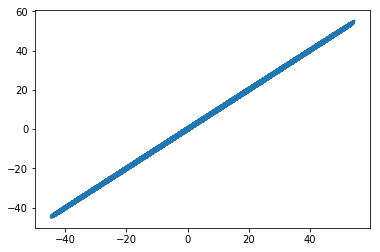

In [21]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])),np.squeeze(training_data['targets']))

Customizing the model

In [27]:
input_size = 2
output_size = 1
#We build the model, necessary when using tensorflow

#tf.keras.layers.Dense(output size) takes the inputs provided to the model and 
#calculates the dot productof the inputsand he weights and add bias
#kernel_initializer and bias initializer initialize weights and biases
model = tf.keras.Sequential([
    tf.keras.layers.Dense(output_size,
                          kernel_initializer = tf.random_uniform_initializer(minval=-0.1,maxval=0.1),
                          bias_initializer = tf.random_uniform_initializer(minval=-0.1,maxval=0.1)
                         )
])
#Customize optimizer
custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)
model.compile(optimizer = custom_optimizer, loss = 'mean_squared_error')
#model.compile(optimizer,loss) configures the model for training

#Which deta tensorflow has to fit?
#model.fit(inputs,targets) fits (trains) the model

model.fit(training_data['inputs'], training_data['targets'], epochs = 100, verbose = 2) # verbose = 0 is for not showing progress bar

Epoch 1/100
100000/100000 - 4s - loss: 0.6485
Epoch 2/100
100000/100000 - 4s - loss: 0.3823
Epoch 3/100
100000/100000 - 4s - loss: 0.3808
Epoch 4/100
100000/100000 - 4s - loss: 0.3839
Epoch 5/100
100000/100000 - 4s - loss: 0.3819
Epoch 6/100
100000/100000 - 4s - loss: 0.3799
Epoch 7/100
100000/100000 - 4s - loss: 0.3802
Epoch 8/100
100000/100000 - 4s - loss: 0.3818
Epoch 9/100
100000/100000 - 4s - loss: 0.3829
Epoch 10/100
100000/100000 - 4s - loss: 0.3843
Epoch 11/100
100000/100000 - 4s - loss: 0.3810
Epoch 12/100
100000/100000 - 4s - loss: 0.3835
Epoch 13/100
100000/100000 - 4s - loss: 0.3809
Epoch 14/100
100000/100000 - 4s - loss: 0.3836
Epoch 15/100
100000/100000 - 4s - loss: 0.3830
Epoch 16/100
100000/100000 - 4s - loss: 0.3834
Epoch 17/100
100000/100000 - 4s - loss: 0.3847
Epoch 18/100
100000/100000 - 4s - loss: 0.3813
Epoch 19/100
100000/100000 - 4s - loss: 0.3840
Epoch 20/100
100000/100000 - 4s - loss: 0.3829
Epoch 21/100
100000/100000 - 4s - loss: 0.3795
Epoch 22/100
100000/10

In [28]:
#[0] is the position layer whose weights we are interested in
model.layers[0].get_weights()


[array([[ 2.0060322],
        [-3.018317 ]], dtype=float32), array([5.0068145], dtype=float32)]

In [29]:
weights = model.layers[0].get_weights()[0]
weights

array([[ 2.0060322],
       [-3.018317 ]], dtype=float32)

In [30]:
bias = model.layers[0].get_weights()[1]
bias

array([5.0068145], dtype=float32)

In [31]:
model.predict_on_batch(training_data['inputs'])

array([[ 32.98804  ],
       [ 16.131798 ],
       [ -6.1845613],
       ...,
       [  3.0987716],
       [-35.7277   ],
       [  9.381792 ]], dtype=float32)

In [32]:
model.predict_on_batch(training_data['inputs']).round(1)

array([[ 33. ],
       [ 16.1],
       [ -6.2],
       ...,
       [  3.1],
       [-35.7],
       [  9.4]], dtype=float32)

In [33]:
training_data['inputs'].round(1)

array([[-0.1, -9.4],
       [ 0. , -3.7],
       [ 5.9,  7.6],
       ...,
       [-6.5, -3.7],
       [-8.8,  7.6],
       [-7.9, -6.7]])

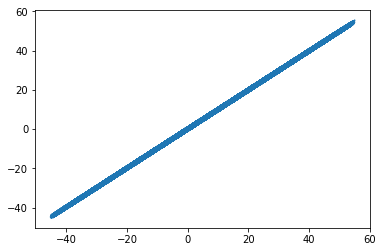

In [34]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])),np.squeeze(training_data['targets']))

Using the same code as before, please solve the following exercises

1. Change the number of observations to 1000,000 and see what happens.

2. Play around with the learning rate. Values like 0.0001, 0.001, 0.1, 1 are all interesting to observe.

3. Change the loss function. An alternative loss for regressions is the Huber loss.

In [0]:
# First, we should declare a variable containing the size of the training set we want to generate.
observations = 1000000

# We will work with two variables as inputs. You can think about them as x1 and x2 in our previous examples.
# We have picked x and z, since it is easier to differentiate them.
# We generate them randomly, drawing from an uniform distribution. There are 3 arguments of this method (low, high, size).
# The size of xs and zs is observations x 1. In this case: 1000 x 1.
xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10, 10, (observations,1))

# Combine the two dimensions of the input into one input matrix. 
# This is the X matrix from the linear model y = x*w + b.
# column_stack is a Numpy method, which combines two matrices (vectors) into one.
generated_inputs = np.column_stack((xs,zs))

# We add a random small noise to the function i.e. f(x,z) = 2x - 3z + 5 + <small noise>
noise = np.random.uniform(-1, 1, (observations,1))

# Produce the targets according to our f(x,z) = 2x - 3z + 5 + noise definition.
# In this way, we are basically saying: the weights should be 2 and -3, while the bias is 5.
generated_targets = 2*xs - 3*zs + 5 + noise

# save into an npz file called "TF_intro"
np.savez('/content/ANN_DL_ML/TF_intro_b', inputs=generated_inputs, targets=generated_targets)

In [0]:
training_data = np.load('/content/ANN_DL_ML/TF_intro_b.npz')

In [0]:
input_size = 2
output_size = 1
#We build the model, necessary when using tensorflow

#tf.keras.layers.Dense(output size) takes the inputs provided to the model and 
#calculates the dot productof the inputsand he weights and add bias
#kernel_initializer and bias initializer initialize weights and biases
model = tf.keras.Sequential([
    tf.keras.layers.Dense(output_size
                         )
])
#Customize optimizer
custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)
model.compile(optimizer = custom_optimizer, loss = 'huber_loss')
#model.compile(optimizer,loss) configures the model for training

#Which deta tensorflow has to fit?
#model.fit(inputs,targets) fits (trains) the model

model.fit(training_data['inputs'], training_data['targets'], epochs = 100, verbose = 2) # verbose = 0 is for not showing progress bar

W0724 16:28:28.362004 140032364136320 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/100
1000000/1000000 - 42s - loss: 0.2026
Epoch 2/100
1000000/1000000 - 42s - loss: 0.1718
Epoch 3/100
1000000/1000000 - 42s - loss: 0.1718
Epoch 4/100
1000000/1000000 - 42s - loss: 0.1719
Epoch 5/100
1000000/1000000 - 42s - loss: 0.1718
Epoch 6/100
1000000/1000000 - 42s - loss: 0.1719
Epoch 7/100
1000000/1000000 - 42s - loss: 0.1718
Epoch 8/100
1000000/1000000 - 42s - loss: 0.1719
Epoch 9/100
1000000/1000000 - 43s - loss: 0.1718
Epoch 10/100
1000000/1000000 - 42s - loss: 0.1720
Epoch 11/100
1000000/1000000 - 42s - loss: 0.1720
Epoch 12/100
1000000/1000000 - 42s - loss: 0.1718
Epoch 13/100
1000000/1000000 - 42s - loss: 0.1719
Epoch 14/100
1000000/1000000 - 42s - loss: 0.1719
Epoch 15/100
1000000/1000000 - 42s - loss: 0.1719
Epoch 16/100
1000000/1000000 - 42s - loss: 0.1719
Epoch 17/100
1000000/1000000 - 42s - loss: 0.1718
Epoch 18/100
1000000/1000000 - 42s - loss: 0.1718
Epoch 19/100
1000000/1000000 - 42s - loss: 0.1719
Epoch 20/100
1000000/1000000 - 42s - loss: 0.1718
Epoch 21/

In [0]:
model.layers[0].get_weights()

In [0]:
weights=model.layers[0].get_weights()[0]
weights

In [0]:
bias=model.layers[0].get_weights()[1]
bias

In [0]:
model.predict_on_batch(training_data['inputs'])

In [0]:
model.predict_on_batch(training_data['inputs']).round(1)

In [0]:
training_data['inputs'].round(1)

In [0]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])),np.squeeze(training_data['targets']))